In [1]:
import numpy as np                      
import pandas as pd                     
import matplotlib.pyplot as plt          
import datetime as dt                   
import seaborn as sns 

# Importing the data in Jupyter Notebook

In [11]:
a_mart= pd.read_excel('AmazingMartEU2(1).xlsx')
a_mart.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England
4,AZ-2011-617423,2011-01-05,Daniel Burke,Echirolles,France,Central,Home Office,2011-01-07,Priority,Auvergne-Rhône-Alpes


In [10]:
a_mart2= pd.read_excel('AmazingMartEU2(1).xlsx',sheet_name='OrderBreakdown')
a_mart2.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [12]:
a_mart3= pd.read_excel('AmazingMartEU2(1).xlsx',sheet_name='SalesTargets')
a_mart3.head()

,Month of Order Date,Category,Target
0,2011-01-01,Furniture,10000
1,2011-02-01,Furniture,10100
2,2011-03-01,Furniture,10300
3,2011-04-01,Furniture,10400
4,2011-05-01,Furniture,10500


In [15]:
a_mart.columns = [i.replace(' ','_') for i in a_mart.columns]
a_mart.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'Country', 'Region',
       'Segment', 'Ship_Date', 'Ship_Mode', 'State'],
      dtype='object')

In [16]:
a_mart2.columns = [i.replace(' ','_') for i in a_mart2.columns]
a_mart2.columns

Index(['Order_ID', 'Product_Name', 'Discount', 'Sales', 'Profit', 'Quantity',
       'Category', 'Sub-Category'],
      dtype='object')

In [17]:
a_mart3.columns = [i.replace(' ','_') for i in a_mart3.columns]
a_mart3.columns

Index(['Month_of_Order_Date', 'Category', 'Target'], dtype='object')

In [20]:
Mart=pd.merge(a_mart,a_mart2,how='inner',left_on='Order_ID',right_on='Order_ID')

In [21]:
Mart.head()

,Order_ID,Order_Date,Customer_Name,City,Country,Region,Segment,Ship_Date,Ship_Mode,State,Product_Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [22]:
AmazingMart=pd.merge(Mart,a_mart3,how='inner',left_on='Category',right_on='Category')

In [23]:
AmazingMart.head()

,Order_ID,Order_Date,Customer_Name,City,Country,Region,Segment,Ship_Date,Ship_Mode,State,Product_Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Month_of_Order_Date,Target
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-01-01,5000
1,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-02-01,5000
2,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-03-01,5000
3,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-04-01,10000
4,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-05-01,10000


In [73]:
AmazingMart.shape

(386256, 19)

# EDA: Exploratory Data Analysis

## Renaming the variables as per the Naming convention.

In [26]:
AmazingMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386256 entries, 0 to 386255
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Order_ID             386256 non-null  object        
 1   Order_Date           386256 non-null  datetime64[ns]
 2   Customer_Name        386256 non-null  object        
 3   City                 386256 non-null  object        
 4   Country              386256 non-null  object        
 5   Region               386256 non-null  object        
 6   Segment              386256 non-null  object        
 7   Ship_Date            386256 non-null  datetime64[ns]
 8   Ship_Mode            386256 non-null  object        
 9   State                386256 non-null  object        
 10  Product_Name         386256 non-null  object        
 11  Discount             386256 non-null  float64       
 12  Sales                386256 non-null  int64         
 13  Profit        

In [29]:
AmazingMart.duplicated().sum()   #duplicate values

96

In [30]:
AmazingMart.duplicated().value_counts()

False    386160
True         96
Name: count, dtype: int64

In [36]:
AmazingMart_New=AmazingMart.drop_duplicates()

In [38]:
AmazingMart_New.duplicated().sum()

0

# Missing Values Treatment

In [39]:
AmazingMart_New.head()

,Order_ID,Order_Date,Customer_Name,City,Country,Region,Segment,Ship_Date,Ship_Mode,State,Product_Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Month_of_Order_Date,Target
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-01-01,5000
1,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-02-01,5000
2,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-03-01,5000
3,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-04-01,10000
4,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-05-01,10000


In [40]:
AmazingMart_New.isna().sum()                #missing values

Order_ID               0
Order_Date             0
Customer_Name          0
City                   0
Country                0
Region                 0
Segment                0
Ship_Date              0
Ship_Mode              0
State                  0
Product_Name           0
Discount               0
Sales                  0
Profit                 0
Quantity               0
Category               0
Sub-Category           0
Month_of_Order_Date    0
Target                 0
dtype: int64

# Checking the relevant and irrelevant variables in the first phase of EDA

In [88]:
AmazingMart_New.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386160 entries, 0 to 386255
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Order_ID             386160 non-null  object        
 1   Order_Date           386160 non-null  datetime64[ns]
 2   Customer_Name        386160 non-null  object        
 3   City                 386160 non-null  object        
 4   Country              386160 non-null  object        
 5   Region               386160 non-null  object        
 6   Segment              386160 non-null  object        
 7   Ship_Date            386160 non-null  datetime64[ns]
 8   Ship_Mode            386160 non-null  object        
 9   State                386160 non-null  object        
 10  Product_Name         386160 non-null  object        
 11  Discount             386160 non-null  float64       
 12  Sales                386160 non-null  int64         
 13  Profit             

In [41]:
AmazingMart_New.City.nunique() 

999

In [42]:
AmazingMart_New.Country.nunique()

15

In [43]:
AmazingMart_New.Country.value_counts()

Country
France            91968
Germany           78720
United Kingdom    63072
Italy             46992
Spain             36480
Netherlands       18864
Austria           12672
Sweden             9744
Belgium            6432
Ireland            4800
Switzerland        3744
Norway             3360
Portugal           3360
Finland            3072
Denmark            2880
Name: count, dtype: int64

<Axes: xlabel='Country'>

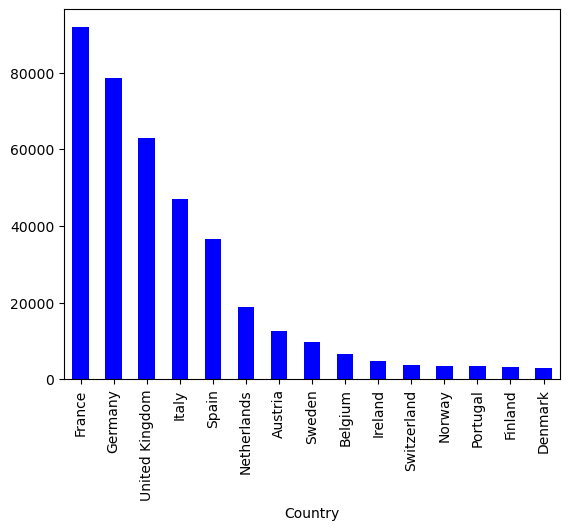

In [44]:
AmazingMart_New.Country.value_counts().plot(kind='bar',color=['Blue'])

In [45]:
AmazingMart_New.Region.nunique()

3

In [46]:
AmazingMart_New.Region.value_counts()

Region
Central    212400
North       86928
South       86832
Name: count, dtype: int64

<Axes: xlabel='Region'>

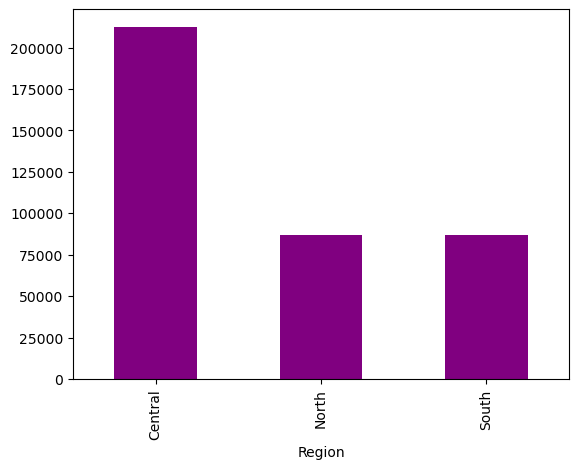

In [47]:
AmazingMart_New.Region.value_counts().plot(kind='bar',color='purple')

In [48]:
AmazingMart_New.Segment.nunique()

3

In [50]:
AmazingMart_New.Segment.value_counts()

Segment
Consumer       200304
Corporate      120672
Home Office     65184
Name: count, dtype: int64

<Axes: xlabel='Segment'>

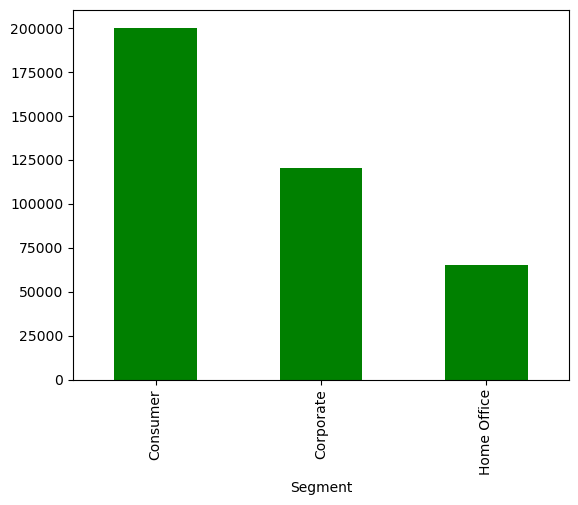

In [53]:
AmazingMart_New.Segment.value_counts().plot(kind='bar',color='green')

In [54]:
AmazingMart_New.Ship_Mode.nunique()

4

In [55]:
AmazingMart_New.Ship_Mode.value_counts()

Ship_Mode
Economy         233280
Economy Plus     76320
Priority         56112
Immediate        20448
Name: count, dtype: int64

<Axes: xlabel='Ship_Mode'>

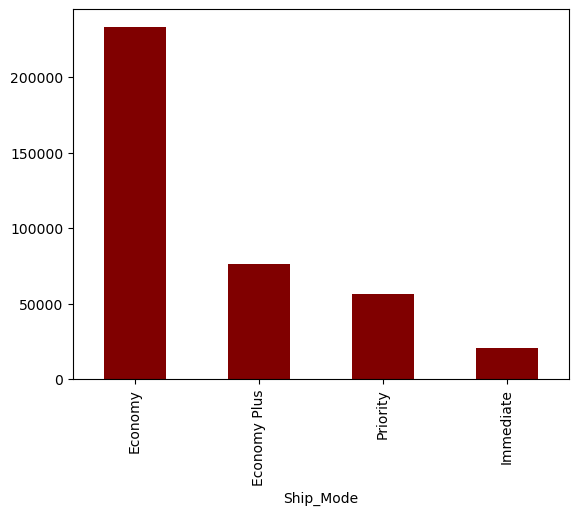

In [59]:
AmazingMart_New.Ship_Mode.value_counts().plot(kind='bar',color='maroon')

In [60]:
AmazingMart_New.Product_Name.nunique()

1810

In [61]:
AmazingMart_New.State.nunique()

127

In [62]:
AmazingMart_New.Category.nunique()

3

In [63]:
AmazingMart_New.Category.value_counts()

Category
Office Supplies    253632
Technology          73104
Furniture           59424
Name: count, dtype: int64

<Axes: xlabel='Category'>

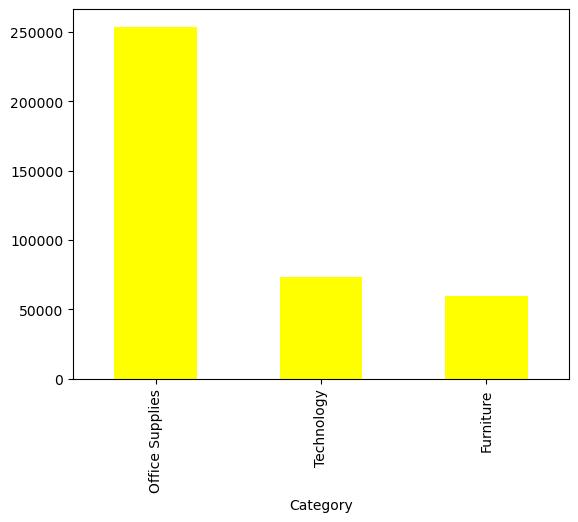

In [64]:
AmazingMart_New.Category.value_counts().plot(kind='bar',color='yellow')

In [68]:
AmazingMart_New.columns = [i.replace('-','_') for i in AmazingMart_New.columns]
AmazingMart_New.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'Country', 'Region',
       'Segment', 'Ship_Date', 'Ship_Mode', 'State', 'Product_Name',
       'Discount', 'Sales', 'Profit', 'Quantity', 'Category', 'Sub_Category',
       'Month_of_Order_Date', 'Target'],
      dtype='object')

In [69]:
AmazingMart_New.Sub_Category.nunique()

17

In [70]:
AmazingMart_New.Sub_Category.value_counts()

Sub_Category
Art            55248
Binders        50784
Storage        50448
Phones         21744
Bookcases      18768
Furnishings    18672
Chairs         18384
Paper          17952
Labels         17856
Accessories    17664
Copiers        17616
Fasteners      16800
Supplies       16656
Envelopes      16608
Machines       16080
Appliances     11280
Tables          3600
Name: count, dtype: int64

<Axes: xlabel='Sub_Category'>

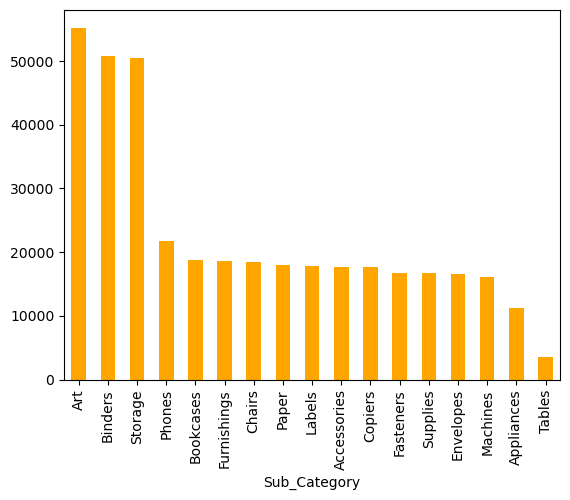

In [71]:
AmazingMart_New.Sub_Category.value_counts().plot(kind='bar',color='orange')

In [72]:
AmazingMart_New.describe()

,Order_Date,Ship_Date,Discount,Sales,Profit,Quantity,Month_of_Order_Date,Target
count,386160,386160,386160.000000,386160.000000,386160.000000,386160.000000,386160,386160.000000
mean,2013-04-19 12:57:32.778123264,2013-04-23 13:07:01.976382720,0.110075,291.903170,35.202237,3.772281,2012-12-15 17:00:00,14611.603480
min,2011-01-01 00:00:00,2011-01-05 00:00:00,0.000000,3.000000,-3060.000000,1.000000,2011-01-01 00:00:00,5000.000000
25%,2012-06-08 00:00:00,2012-06-13 00:00:00,0.000000,48.000000,1.000000,2.000000,2011-12-24 06:00:00,11475.000000
50%,2013-06-11 00:00:00,2013-06-15 00:00:00,0.000000,117.000000,14.000000,3.000000,2012-12-16 12:00:00,14000.000000
75%,2014-04-30 00:00:00,2014-05-05 00:00:00,0.100000,313.000000,47.000000,5.000000,2013-12-08 18:00:00,18000.000000
max,2014-12-31 00:00:00,2015-01-05 00:00:00,0.850000,6517.000000,2476.000000,14.000000,2014-12-01 00:00:00,26000.000000
std,NaN,NaN,0.181776,485.229085,178.136905,2.203475,NaN,4706.500294


# Outlier Treatment

In [74]:
AmazingMart_New.head()   

,Order_ID,Order_Date,Customer_Name,City,Country,Region,Segment,Ship_Date,Ship_Mode,State,Product_Name,Discount,Sales,Profit,Quantity,Category,Sub_Category,Month_of_Order_Date,Target
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-01-01,5000
1,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-02-01,5000
2,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-03-01,5000
3,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-04-01,10000
4,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011-05-01,10000


## Observing a single column for the outliers

In [75]:
AmazingMart_New.describe()

,Order_Date,Ship_Date,Discount,Sales,Profit,Quantity,Month_of_Order_Date,Target
count,386160,386160,386160.000000,386160.000000,386160.000000,386160.000000,386160,386160.000000
mean,2013-04-19 12:57:32.778123264,2013-04-23 13:07:01.976382720,0.110075,291.903170,35.202237,3.772281,2012-12-15 17:00:00,14611.603480
min,2011-01-01 00:00:00,2011-01-05 00:00:00,0.000000,3.000000,-3060.000000,1.000000,2011-01-01 00:00:00,5000.000000
25%,2012-06-08 00:00:00,2012-06-13 00:00:00,0.000000,48.000000,1.000000,2.000000,2011-12-24 06:00:00,11475.000000
50%,2013-06-11 00:00:00,2013-06-15 00:00:00,0.000000,117.000000,14.000000,3.000000,2012-12-16 12:00:00,14000.000000
75%,2014-04-30 00:00:00,2014-05-05 00:00:00,0.100000,313.000000,47.000000,5.000000,2013-12-08 18:00:00,18000.000000
max,2014-12-31 00:00:00,2015-01-05 00:00:00,0.850000,6517.000000,2476.000000,14.000000,2014-12-01 00:00:00,26000.000000
std,NaN,NaN,0.181776,485.229085,178.136905,2.203475,NaN,4706.500294


In [78]:
min_Prod = AmazingMart_New.Profit.min()
min_Prod

-3060

In [79]:
max_Prod = AmazingMart_New.Profit.max()
max_Prod

2476

<Axes: >

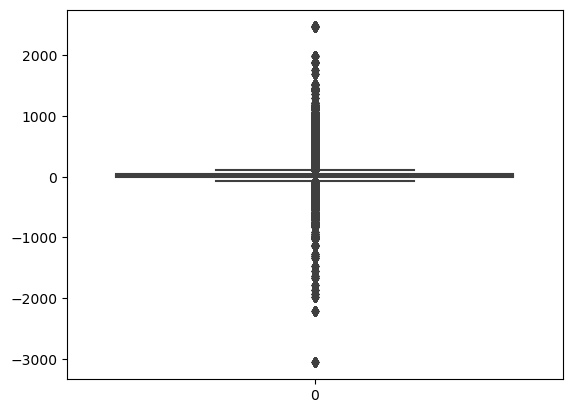

In [80]:
sns.boxplot(AmazingMart_New.Profit)

In [82]:
AmazingMart_New.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'Country', 'Region',
       'Segment', 'Ship_Date', 'Ship_Mode', 'State', 'Product_Name',
       'Discount', 'Sales', 'Profit', 'Quantity', 'Category', 'Sub_Category',
       'Month_of_Order_Date', 'Target'],
      dtype='object')

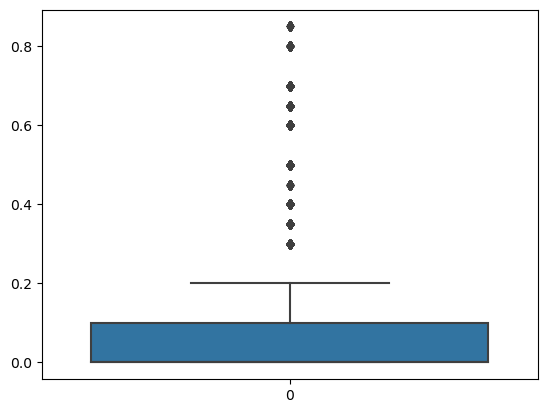

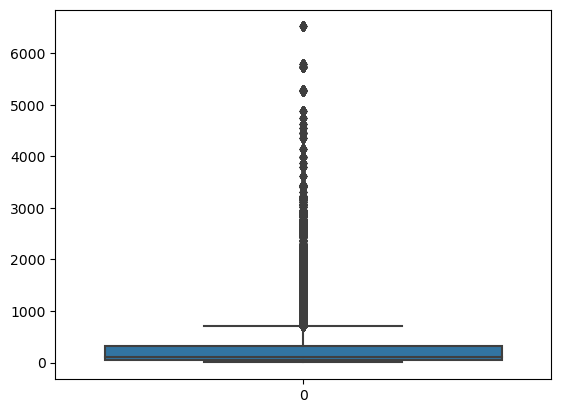

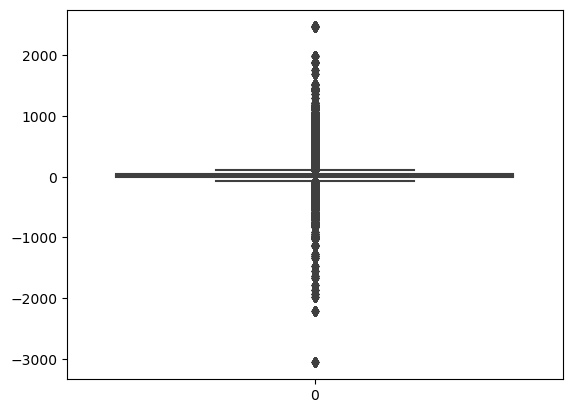

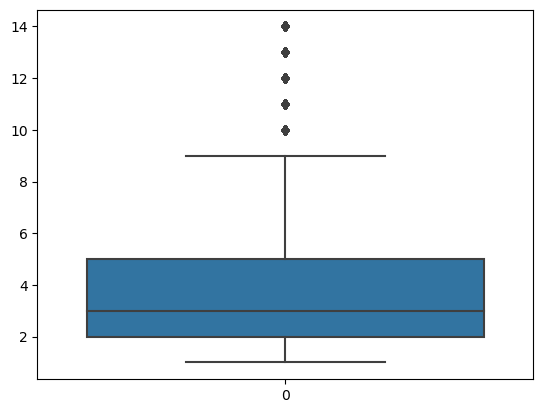

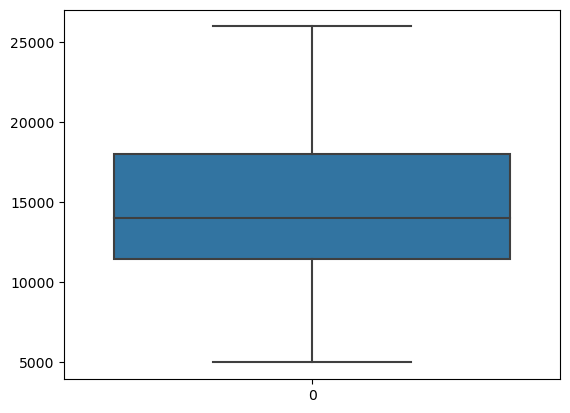

In [89]:
numeric_cols = AmazingMart_New.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    sns.boxplot(AmazingMart_New[col])
    plt.show()

In [90]:
# Selecting only numeric columns
numeric_cols = AmazingMart_New.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:")
print(lower_bound)

print("\nUpper Bound:")
print(upper_bound)

Lower Bound:
Discount      -0.15
Sales       -349.50
Profit       -68.00
Quantity      -2.50
Target      1687.50
dtype: float64

Upper Bound:
Discount        0.25
Sales         710.50
Profit        116.00
Quantity        9.50
Target      27787.50
dtype: float64


<Axes: >

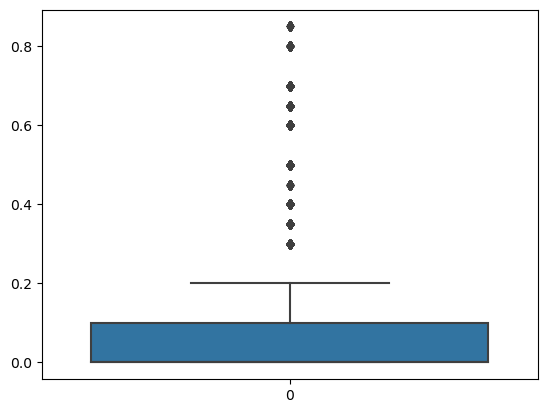

In [94]:
sns.boxplot(AmazingMart_New.Discount)

<Axes: >

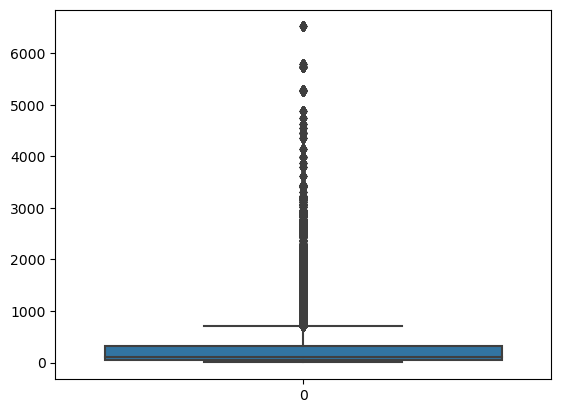

In [95]:
sns.boxplot(AmazingMart_New.Sales)

In [96]:
AmazingMart_New['Discount'] = AmazingMart_New.Sales.clip(lower = lc, upper = uc)

NameError: name 'lc' is not defined

In [97]:
# Selecting only numeric columns
numeric_cols = AmazingMart_New.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define lower and upper bounds for the Sales column
lc = lower_bound['Sales']
uc = upper_bound['Sales']

# Clip the values in the Sales column using the calculated bounds
AmazingMart_New['Discount'] = AmazingMart_New['Sales'].clip(lower=lc, upper=uc)

print(AmazingMart_New['Discount'])

0          45.0
1          45.0
2          45.0
3          45.0
4          45.0
          ...  
386251    108.0
386252    108.0
386253    108.0
386254    108.0
386255    108.0
Name: Discount, Length: 386160, dtype: float64


C:\Users\ACER\AppData\Local\Temp\ipykernel_8888\262352848.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AmazingMart_New['Discount'] = AmazingMart_New['Sales'].clip(lower=lc, upper=uc)


# Outlier treatment IQR Method

In [98]:
def outlier_IQR(s):
    m = s.quantile(0.5)
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    q_1p = s.quantile(0.01)
    q_99p = s.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    result = pd.Series([m,q1,q3,q_1p,q_99p,iqr,lc,uc])
    result.index = ['median','first_quartile','third_quartile','pc_1','pc_99','iqr','lower_cutoff','upper_cutoff']
    return result

In [99]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [100]:
AmazingMart_New.apply(outliertreat_IQR)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [101]:
# Define the outlier treatment function using IQR
def outliertreat_IQR(d):
    if pd.api.types.is_numeric_dtype(d):
        Q1 = d.quantile(0.25)
        Q3 = d.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return np.clip(d, lower_bound, upper_bound)
    else:
        return d

In [102]:
AmazingMart_New = AmazingMart_New.apply(outliertreat_IQR)

In [103]:
print(AmazingMart_New)

               Order_ID Order_Date    Customer_Name       City      Country  \
0       BN-2011-7407039 2011-01-01       Ruby Patel  Stockholm       Sweden   
1       BN-2011-7407039 2011-01-01       Ruby Patel  Stockholm       Sweden   
2       BN-2011-7407039 2011-01-01       Ruby Patel  Stockholm       Sweden   
3       BN-2011-7407039 2011-01-01       Ruby Patel  Stockholm       Sweden   
4       BN-2011-7407039 2011-01-01       Ruby Patel  Stockholm       Sweden   
...                 ...        ...              ...        ...          ...   
386251  BN-2014-4140795 2014-12-31  Daniel Hamilton  Eindhoven  Netherlands   
386252  BN-2014-4140795 2014-12-31  Daniel Hamilton  Eindhoven  Netherlands   
386253  BN-2014-4140795 2014-12-31  Daniel Hamilton  Eindhoven  Netherlands   
386254  BN-2014-4140795 2014-12-31  Daniel Hamilton  Eindhoven  Netherlands   
386255  BN-2014-4140795 2014-12-31  Daniel Hamilton  Eindhoven  Netherlands   

         Region      Segment  Ship_Date     Ship_Mo